<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/trajectory_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

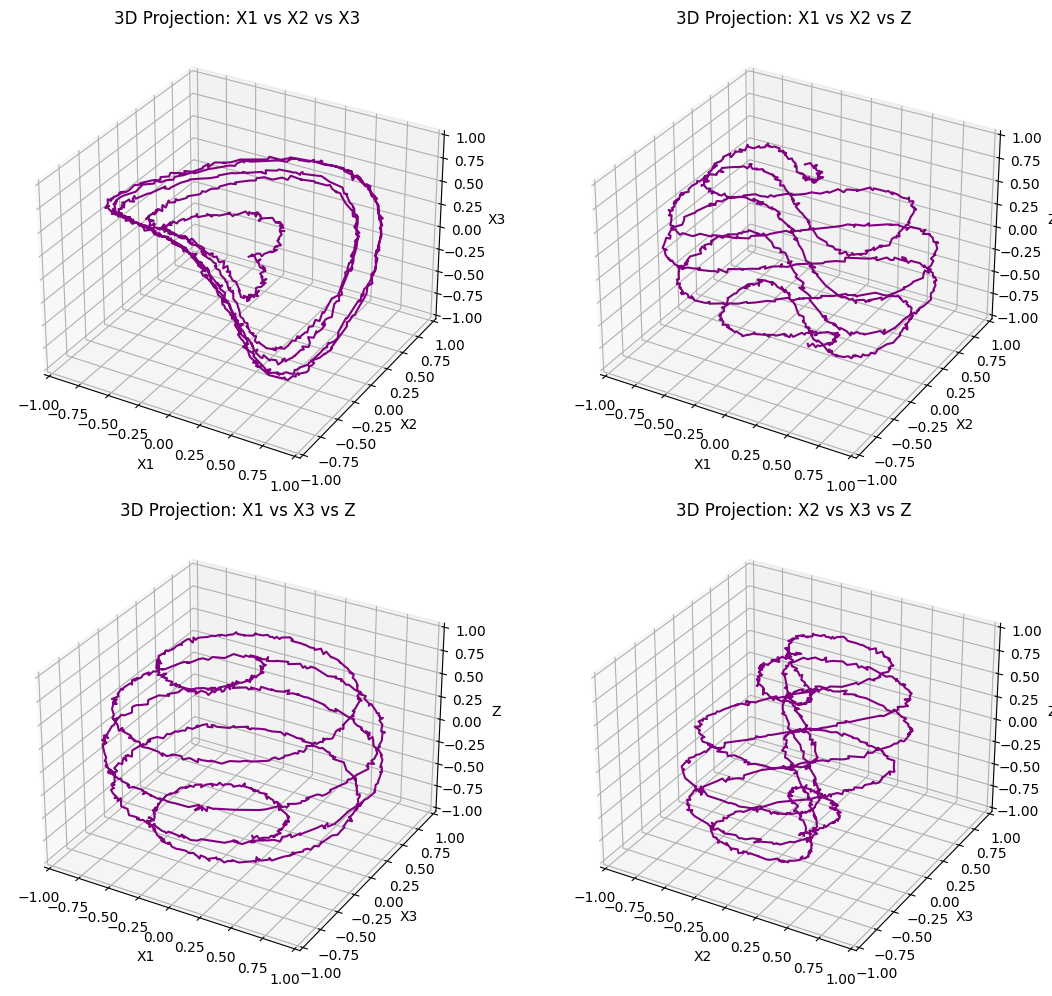

In [18]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_points = 1000       # Number of points along the spiral
sphere_radius = 1.0     # Radius of the 3D sphere within 4D space
spiral_turns = 5        # Number of turns of the spiral along the sphere
z_max = sphere_radius   # Maximum coordinate in the linear dimension
noise_scale = 0.01     # Scale (standard deviation) of the normal distribution noise

# Generate points along the spherical spiral in 4D
theta = torch.distributions.Uniform(0, spiral_turns * 2 * torch.pi).sample((num_points,)).sort().values  # Azimuthal angle (spirals around linear dimension). uniformaly sampled
z = torch.distributions.Uniform(-z_max, z_max).sample((num_points,)).sort().values                       # uniformaly sampled values for the 4th dimension

# Calculate radial distance to keep points on the 3D sphere in 4D space
r = torch.sqrt(sphere_radius**2 - z**2)  # Radial distance in 3D space (within 4D)

# Convert spherical to Cartesian coordinates for 3 dimensions in the sphere
x1 = r * torch.cos(theta)
x2 = r * torch.sin(theta) * torch.cos(theta)
x3 = r * torch.sin(theta)

# Add Gaussian noise to each spherical coordinate
x1 += torch.normal(mean=0.0, std=noise_scale, size=(num_points,))
x2 += torch.normal(mean=0.0, std=noise_scale, size=(num_points,))
x3 += torch.normal(mean=0.0, std=noise_scale, size=(num_points,))
z += torch.normal(mean=0.0, std=noise_scale, size=(num_points,))

# List of 3D variable combinations to plot
combinations = [
    (x1, x2, x3),   # (x1, x2, x3)
    (x1, x2, z),    # (x1, x2, z)
    (x1, x3, z),    # (x1, x3, z)
    (x2, x3, z)     # (x2, x3, z)
]
labels = [
    ('X1', 'X2', 'X3'),
    ('X1', 'X2', 'Z'),
    ('X1', 'X3', 'Z'),
    ('X2', 'X3', 'Z')
]

# Plot each combination in a separate 3D subplot
fig = plt.figure(figsize=(12, 10))
for i, ((x, y, z), (label_x, label_y, label_z)) in enumerate(zip(combinations, labels), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot(x.numpy(), y.numpy(), z.numpy(), color='purple')
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_zlabel(label_z)
    ax.set_title(f'3D Projection: {label_x} vs {label_y} vs {label_z}')
    ax.set_xlim([-sphere_radius, sphere_radius])
    ax.set_ylim([-sphere_radius, sphere_radius])
    ax.set_zlim([-sphere_radius, sphere_radius])

plt.tight_layout()
plt.show()


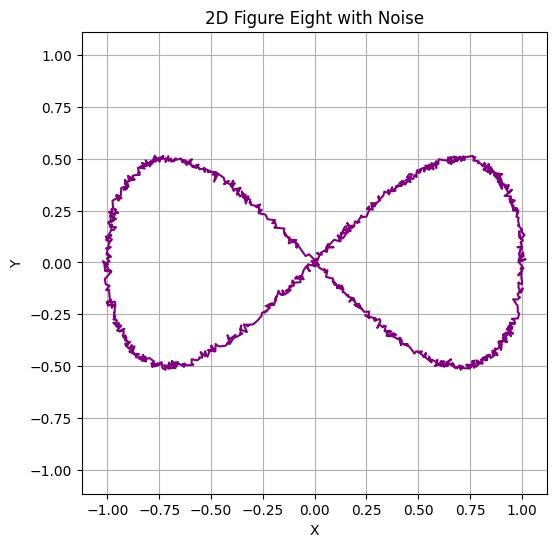

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000       # Number of points along the curve
scale = 1.0             # Scale of the figure-eight shape
noise_scale = 0.01      # Scale of the normal distribution noise

# Generate the angle variable theta
theta = torch.distributions.Uniform(0, 2 * np.pi).sample((num_points,)).sort().values.numpy()

# Define the lemniscate (figure-eight) curve in polar form and convert to Cartesian coordinates
x = scale * np.sin(theta)
y = scale * np.sin(theta) * np.cos(theta)

# Add Gaussian noise to each coordinate to make it a bit irregular
x += np.random.normal(0, noise_scale, num_points)
y += np.random.normal(0, noise_scale, num_points)

# Plot the figure-eight shape
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Figure Eight with Noise')
plt.axis('equal')  # Keep aspect ratio square
plt.grid(True)
plt.show()
